# Importacion de librerias

In [77]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Importación de dataset
Se descarga y carga el dataset de predicción solar desde Kaggle. datos.head() donde se muestra las primeras filas del dataset para una vista preliminar.

In [78]:
path = kagglehub.dataset_download("dronio/SolarEnergy")
datos = pd.read_csv(path + "/SolarPrediction.csv")
datos.head()

UNIXTime                   Data      Time  Radiation  Temperature  \
0  1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1  1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2  1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3  1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4  1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   

   Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  
0     30.46        59                  177.39   5.62    06:13:00   18:13:00  
1     30.46        58                  176.78   3.37    06:13:00   18:13:00  
2     30.46        57                  158.75   3.37    06:13:00   18:13:00  
3     30.46        60                  137.71   3.37    06:13:00   18:13:00  
4     30.46        62                  104.95   5.62    06:13:00   18:13:00

# EDA

## Generación de variables de tiempo
Durante estás líneas vamos a extraer y crear nuevas variables de tiempo (día, mes, año, hora, duración del día) a partir de las columnas Data y Time del dataset

In [79]:
datos
#extraer dia de datos['Data']
datos['day'] = pd.to_numeric( datos['Data'].str.split(' ').str[0].str.split('/').str[1])
#extraer mes de datos['Data']
datos['month'] = pd.to_numeric(datos['Data'].str.split(' ').str[0].str.split('/').str[0])
#extraer año de datos['Data']
datos['year'] = pd.to_numeric(datos['Data'].str.split(' ').str[0].str.split('/').str[2])
#extraer hora de datos['time']
datos['hour'] = pd.to_numeric(datos['Time'].str.split(':').str[0])
#calcular la duracion del dia
datos['duration_day'] =  (pd.to_numeric(datos['TimeSunSet'].str.split(':').str[0])+(pd.to_numeric(datos['TimeSunSet'].str.split(':').str[1])/60))-(pd.to_numeric(datos['TimeSunRise'].str.split(':').str[0])+(pd.to_numeric(datos['TimeSunRise'].str.split(':').str[1])/60))

In [80]:
display(datos)

UNIXTime                   Data      Time  Radiation  Temperature  \
0      1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1      1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2      1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3      1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4      1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   
...           ...                    ...       ...        ...          ...   
32681  1480587604  12/1/2016 12:00:00 AM  00:20:04       1.22           44   
32682  1480587301  12/1/2016 12:00:00 AM  00:15:01       1.17           44   
32683  1480587001  12/1/2016 12:00:00 AM  00:10:01       1.20           44   
32684  1480586702  12/1/2016 12:00:00 AM  00:05:02       1.23           44   
32685  1480586402  12/1/2016 12:00:00 AM  00:00:02       1.20           44   

       Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise  \
0         30.46        59                  177.39   5.62    06:13:00   
1         30.46        58                  176.78   3.37    06:13:00   
2         30.46        57                  158.75   3.37    06:13:00   
3         30.46        60                  137.71   3.37    06:13:00   
4         30.46        62                  104.95   5.62    06:13:00   
...         ...       ...                     ...    ...         ...   
32681     30.43       102                  145.42   6.75    06:41:00   
32682     30.42       102                  117.78   6.75    06:41:00   
32683     30.42       102                  145.19   9.00    06:41:00   
32684     30.42       101                  164.19   7.87    06:41:00   
32685     30.43       101                   83.59   3.37    06:41:00   

      TimeSunSet  day  month  year  hour  duration_day  
0       18:13:00   29      9  2016    23     12.000000  
1       18:13:00   29      9  2016    23     12.000000  
2       18:13:00   29      9  2016    23     12.000000  
3       18:13:00   29      9  2016    23     12.000000  
4       18:13:00   29      9  2016    23     12.000000  
...          ...  ...    ...   ...   ...           ...  
32681   17:42:00    1     12  2016     0     11.016667  
32682   17:42:00    1     12  2016     0     11.016667  
32683   17:42:00    1     12  2016     0     11.016667  
32684   17:42:00    1     12  2016     0     11.016667  
32685   17:42:00    1     12  2016     0     11.016667  

[32686 rows x 16 columns]

## Limpieza inicial
Se verifica la existencia de valores nulos en el dataset. En este caso como se visualiza, no hay datos nulos, por lo que no es necesario eliminar o imputar datos

### Manejo de datos nulos

In [81]:
print(datos.isna().sum())

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
day                       0
month                     0
year                      0
hour                      0
duration_day              0
dtype: int64


**Conclusiones**

*   No hay datos Nulos
*   No es necesario la eliminacion o imputacion de datos



### Eliminacion de caracteristicas

Dentro de esta parte vamos a convertir los tiempos UNIX a fechas legibles y calcular la zona horaria, luego y posteriormente eliminamos las columnas redundantes para el análisis dentro del dataset

In [82]:
#convertir datos['unixtime'] to datetime
datos['UNIXTime_fecha'] = datos['UNIXTime'].apply(lambda x: datetime.utcfromtimestamp(int(x)).strftime('%H:%M:%S'))
#calculamos timezone apartir de la hora utc y la hora local
datos['TimeZone'] = pd.to_numeric(datos['UNIXTime_fecha'].str.split(':').str[0])-pd.to_numeric(datos['Time'].str.split(':').str[0])

In [83]:
#Se elimiminan datos redundantes y temporales
datos.drop('UNIXTime', axis=1, inplace=True) # ya tenemos horas y fecha local
datos.drop('UNIXTime_fecha', axis=1, inplace=True) # variable temporal


In [84]:
display(datos)

Data      Time  Radiation  Temperature  Pressure  \
0      9/29/2016 12:00:00 AM  23:55:26       1.21           48     30.46   
1      9/29/2016 12:00:00 AM  23:50:23       1.21           48     30.46   
2      9/29/2016 12:00:00 AM  23:45:26       1.23           48     30.46   
3      9/29/2016 12:00:00 AM  23:40:21       1.21           48     30.46   
4      9/29/2016 12:00:00 AM  23:35:24       1.17           48     30.46   
...                      ...       ...        ...          ...       ...   
32681  12/1/2016 12:00:00 AM  00:20:04       1.22           44     30.43   
32682  12/1/2016 12:00:00 AM  00:15:01       1.17           44     30.42   
32683  12/1/2016 12:00:00 AM  00:10:01       1.20           44     30.42   
32684  12/1/2016 12:00:00 AM  00:05:02       1.23           44     30.42   
32685  12/1/2016 12:00:00 AM  00:00:02       1.20           44     30.43   

       Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  day  \
0            59                  177.39   5.62    06:13:00   18:13:00   29   
1            58                  176.78   3.37    06:13:00   18:13:00   29   
2            57                  158.75   3.37    06:13:00   18:13:00   29   
3            60                  137.71   3.37    06:13:00   18:13:00   29   
4            62                  104.95   5.62    06:13:00   18:13:00   29   
...         ...                     ...    ...         ...        ...  ...   
32681       102                  145.42   6.75    06:41:00   17:42:00    1   
32682       102                  117.78   6.75    06:41:00   17:42:00    1   
32683       102                  145.19   9.00    06:41:00   17:42:00    1   
32684       101                  164.19   7.87    06:41:00   17:42:00    1   
32685       101                   83.59   3.37    06:41:00   17:42:00    1   

       month  year  hour  duration_day  TimeZone  
0          9  2016    23     12.000000       -14  
1          9  2016    23     12.000000       -14  
2          9  2016    23     12.000000       -14  
3          9  2016    23     12.000000       -14  
4          9  2016    23     12.000000       -14  
...      ...   ...   ...           ...       ...  
32681     12  2016     0     11.016667        10  
32682     12  2016     0     11.016667        10  
32683     12  2016     0     11.016667        10  
32684     12  2016     0     11.016667        10  
32685     12  2016     0     11.016667        10  

[32686 rows x 16 columns]

### Analisis outliers

Aquí realizamos un análisis descriptivo y visualización de outliers en las variables del dataset. Como se puede visualizar en la parte inferior vamos a utilizar gráficos de caja y dispersión para identificar valores atipicos dentro de los datos relevantes que se están contemplando

In [85]:
datos.describe()

Radiation   Temperature      Pressure      Humidity  \
count  32686.000000  32686.000000  32686.000000  32686.000000   
mean     207.124697     51.103255     30.422879     75.016307   
std      315.916387      6.201157      0.054673     25.990219   
min        1.110000     34.000000     30.190000      8.000000   
25%        1.230000     46.000000     30.400000     56.000000   
50%        2.660000     50.000000     30.430000     85.000000   
75%      354.235000     55.000000     30.460000     97.000000   
max     1601.260000     71.000000     30.560000    103.000000   

       WindDirection(Degrees)         Speed           day         month  \
count            32686.000000  32686.000000  32686.000000  32686.000000   
mean               143.489821      6.243869     15.825766     10.526066   
std                 83.167500      3.490474      8.711824      1.096691   
min                  0.090000      0.000000      1.000000      9.000000   
25%                 82.227500      3.370000      9.000000     10.000000   
50%                147.700000      5.620000     16.000000     11.000000   
75%                179.310000      7.870000     23.000000     11.000000   
max                359.950000     40.500000     31.000000     12.000000   

          year          hour  duration_day      TimeZone  
count  32686.0  32686.000000  32686.000000  32686.000000  
mean    2016.0     11.557425     11.509176     -0.081380  
std        0.0      6.912034      0.498854     11.845809  
min     2016.0      0.000000     10.933333    -14.000000  
25%     2016.0      6.000000     11.033333    -14.000000  
50%     2016.0     12.000000     11.400000     10.000000  
75%     2016.0     18.000000     11.916667     10.000000  
max     2016.0     23.000000     12.516667     10.000000

# **Diagrama de caja**
Se realiza un diagrama de caja con el fin de detectar valores atípicos entre los datos

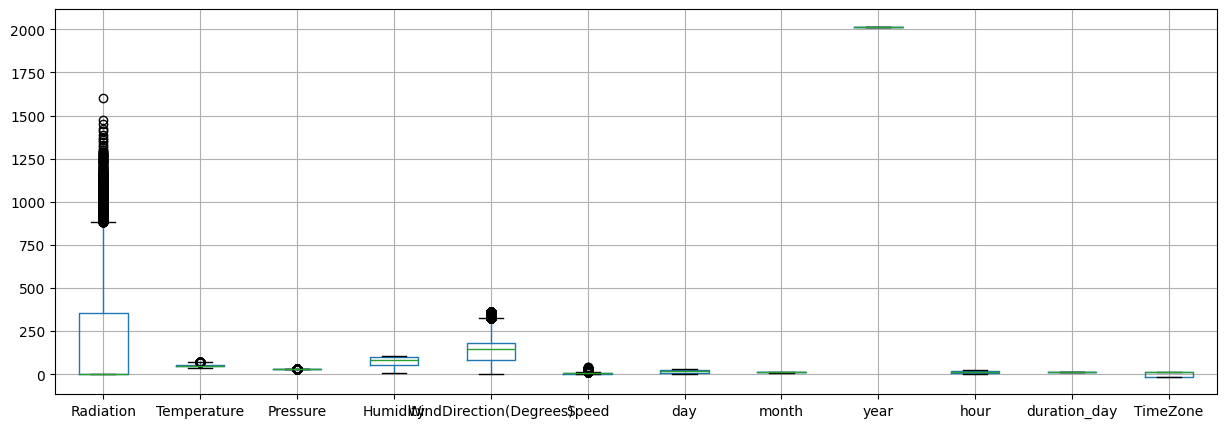

In [86]:
datos.boxplot(figsize=(15, 5))
plt.show()

# **Creamos un diagrama de dispersión**
Realizamos un gráfico de dispersión que muestra cómo varia la radiación a lo largo del día, esto lo hacemos con el fin de identificar las horas del día con mayor o menor radiación, detectar cualquier patrón diario en los niveles de radiación y visualizar la dispersión y variabilidad de los datos de radiación

In [87]:
fig1 = px.scatter(datos,x='hour', y='Radiation',color='Radiation',height=300)
fig1

# **Creamos un histograma**

Realizamos una distribución con los niveles de radiación medidos, lo cual nos muestra como se distribuye los niveles de radiación en el conjunto de datos, esto, con el fin de verificar si los niveles de radiación siguen una distribución normal o alguna otra distribución, poder identificar rangos de radiación que ocurren con mayor frecuencia y detectar posibles valores atipicos en los niveles de radiación.

In [88]:
mean_Radiation = datos['Radiation'].mean()
std_Radiation = datos['Radiation'].std()
#calcular el limite por 1,5 rango intercuartil
iqr_Radiation = datos['Radiation'].quantile(0.75) - datos['Radiation'].quantile(0.25)
lim_inf_rad = datos['Radiation'].quantile(0.25) -(1.5)*(iqr_Radiation)
#lim_inf_rad =  mean_Radiation - 3 * std_Radiation
lim_sup_rad = datos['Radiation'].quantile(0.75) +(1.5)*(iqr_Radiation)

fig = px.histogram(datos, x='Radiation', title='Radiation', height=300)
fig.add_vline(x=lim_inf_rad, line_color='red')
fig.add_vline(x=lim_sup_rad, line_color='red')
fig.add_vline(x=mean_Radiation, line_color='green')
fig

Analisis
los limites inferiores y superiores son arbitrarios

# **Creamos un diagrama de dispersión con la hora y la dirección del viento**

Con esta grafica mostramos evidenciar como varía la dirección del viento a lo largo del día, con el fin de evaluar identificar las horas del día con dirrecciones de viento más contante, detectar cualquier patrón diario

In [89]:
fig1 = px.scatter(datos,x='hour', y='WindDirection(Degrees)',color='WindDirection(Degrees)',height=300)
fig1

# **Creamos un histograma para la dirección del viento**

Dentro de la grafica que visualizamos a continuación buscamos identificar cómo varia la dirección del viento a lo largo del día.


In [90]:
mean_Radiation = datos['WindDirection(Degrees)'].mean()
std_Radiation = datos['WindDirection(Degrees)'].std()
lim_inf_wind =  mean_Radiation - 3 * std_Radiation
lim_sup_wind = mean_Radiation + 3 * std_Radiation

fig = px.histogram(datos, x='WindDirection(Degrees)', title='WindDirection(Degrees)',height=300)
fig.add_vline(x=lim_inf_wind, line_color='red')
fig.add_vline(x=lim_sup_wind, line_color='red')
fig.add_vline(x=mean_Radiation, line_color='green')
fig

**Conclusiones**

*   WindDirection(Degrees) no presenta outliers bajo el criterio de 3desviaciones standares
*   Radiation presenta outliers, no es recomendable ni eliminar ni recortar, se evaluaran los modelos con los datos anomalos y con los datos recortados.



In [91]:
datos_outlier_recordatos = datos[(datos['Radiation'] > lim_inf_rad) & (datos['Radiation'] < lim_sup_rad)]
fig1 = px.scatter(datos_outlier_recordatos,x='hour', y='Radiation',color='Radiation',height=300)
fig1

## Visualizaciones

Dentro de las imagenes a continuación generamos histogramas de todas las variables numéricas con un mapa de calor para visualizar las correlaciones que pueden existir dentro de las variables

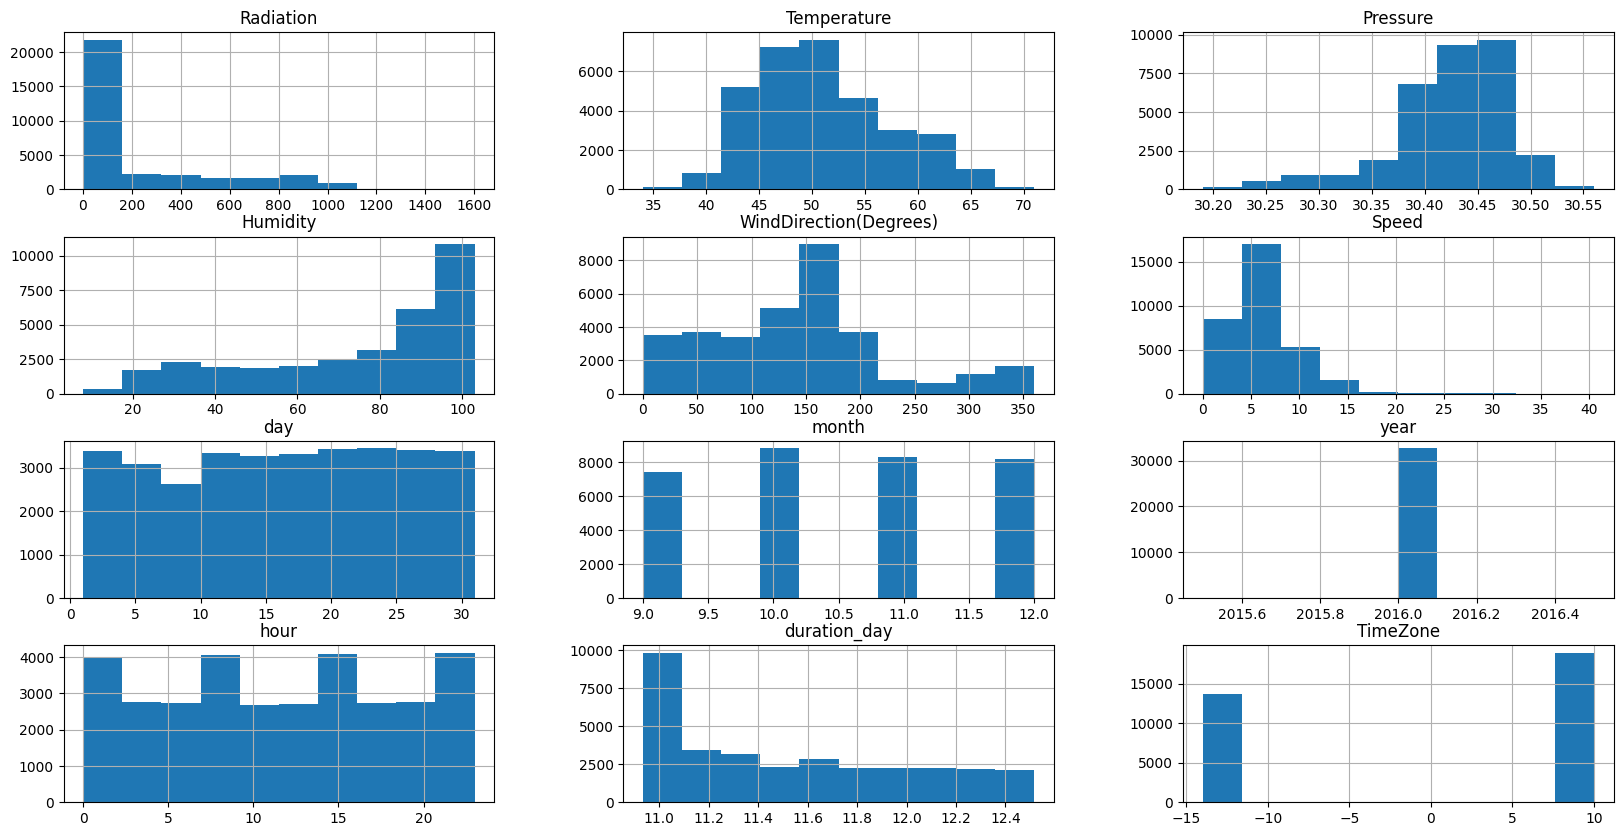

In [92]:
#plot histogramas de todas las variables numericas
datos.hist(figsize=(20, 10))
plt.show()

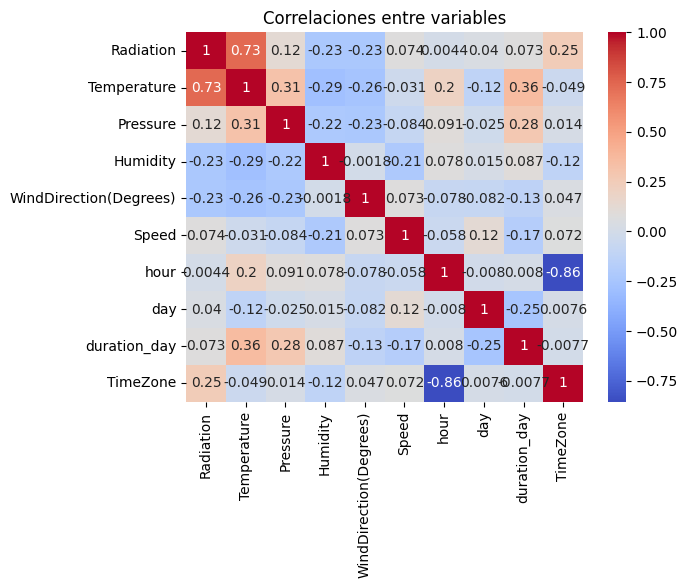

In [93]:
corr = datos[['Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed','hour','day','duration_day','TimeZone']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlaciones entre variables')
plt.show()

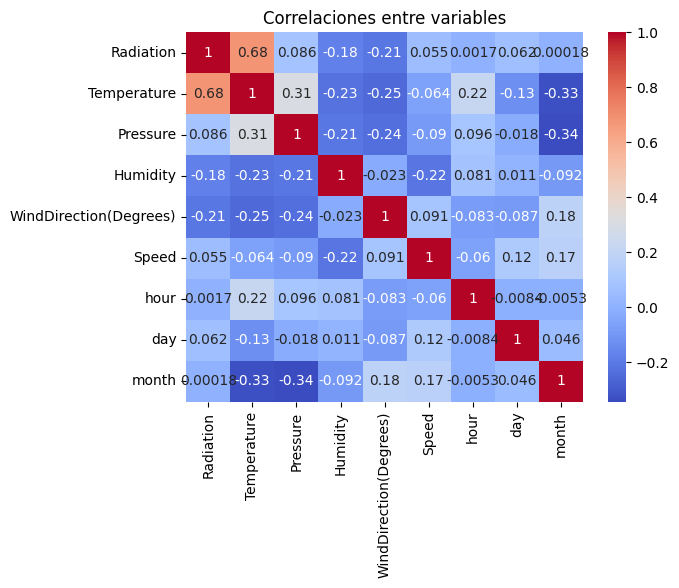

In [94]:
corr = datos_outlier_recordatos[['Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed','hour','day','month']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlaciones entre variables')
plt.show()

Analisis bivariado

A continuación buscamos medir la relación entre variables para entender cómo las variables están relacionadas, ejemplo podemos encontrar que la temperatura y la radiación tienen una correlación positiva, lo que podría indicar que a medida que aumente la radiación solar también lo hará la temperatura.

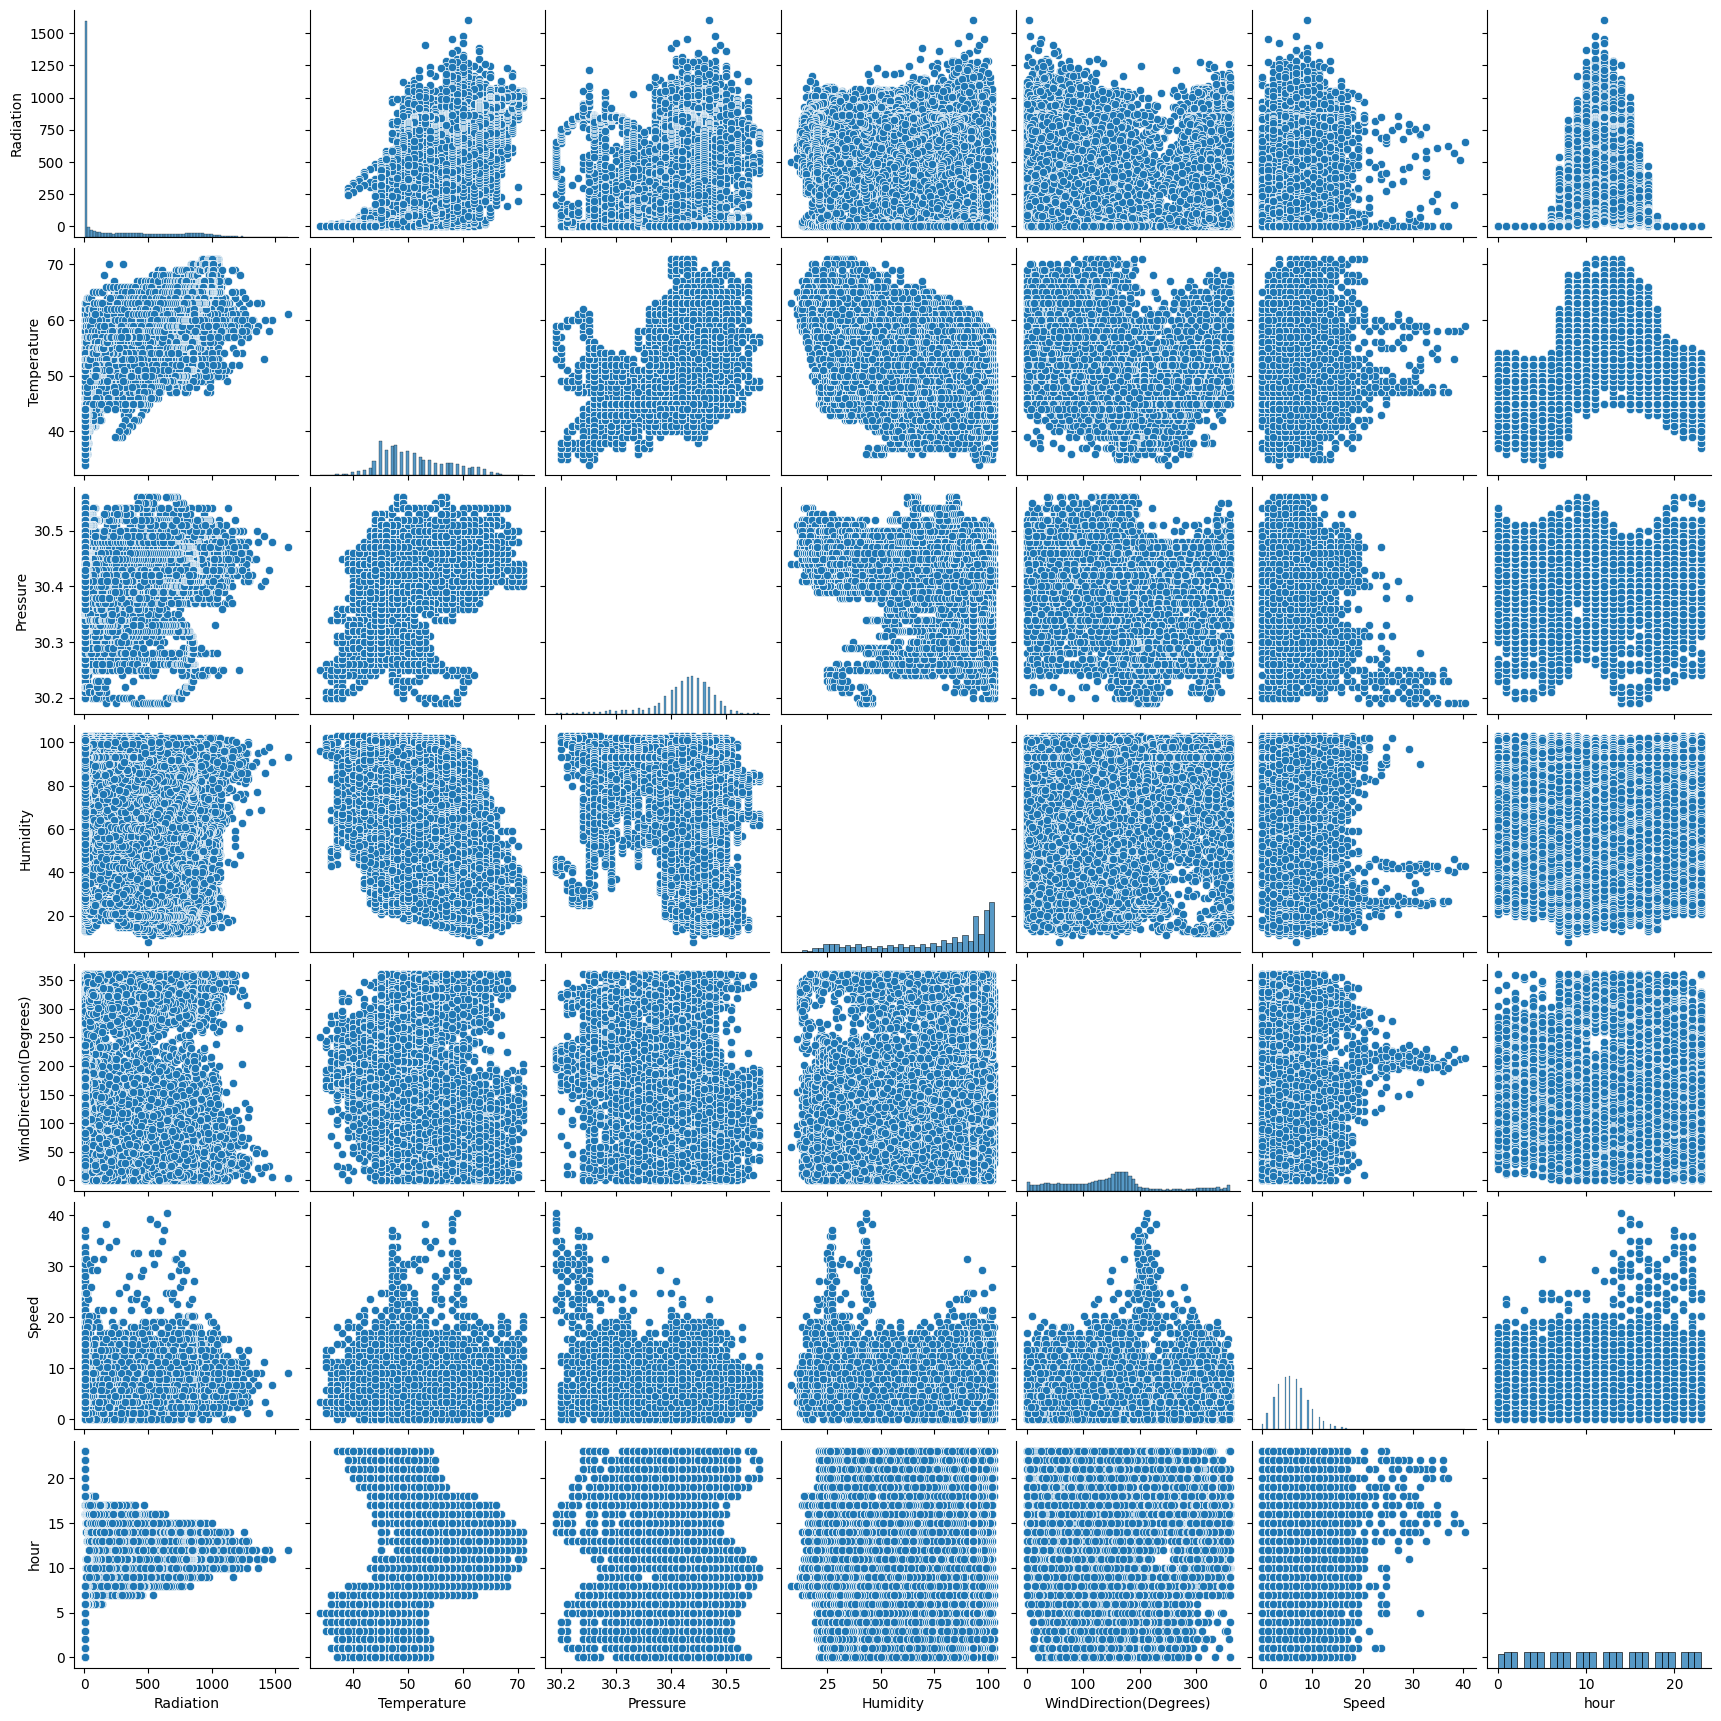

In [95]:
#realizar analisis bivariado
sns.pairplot(datos[['Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed','hour']])
plt.show()

# Preprocesamiento
En este punto normalizamos las variables numéricas utilizando StandarScaler para tener media o y desviación estándar 1.

## Insights

In [96]:
# Calcular cuartiles
q1 = datos['Radiation'].quantile(0.25)
q2 = datos['Radiation'].quantile(0.5)
q3 = datos['Radiation'].quantile(0.75)

bins = [datos['Radiation'].min(), q1, q2, q3, datos['Radiation'].max()]
labels = ['Muy Bajo', 'Bajo', 'Medio', 'Alto']

datos['RadiationLevel'] = pd.cut(datos['Radiation'], bins=bins, labels=labels, include_lowest=True)
datos_outlier_recordatos['RadiationLevel'] = pd.cut(datos_outlier_recordatos['Radiation'], bins=bins, labels=labels, include_lowest=True)

<ipython-input-96-0cc93d191d0b>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Normalizacion

A continuación vamos a ajustar los valores de las variables para que tengan una escala común. Esto lo hacemos principalmente porque existen variables que tienen diferentes unidades y rangos, por ejemplo como visualizamos los datos se transforman para que tenga una media de 0 y una desviación estándar de 1

In [97]:
# Supongamos que df es tu DataFrame original y que ya has seleccionado las columnas numéricas
# Ejemplo: variables = ['Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'duration_day']
variables = ['Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'duration_day']

# Creamos una copia para no afectar el DataFrame original
datos_scaled = datos.copy()
datos_outlier_recordatos_scaled = datos_outlier_recordatos.copy()

# Inicializamos el escalador
scaler = StandardScaler()

# Ajustamos el escalador a los datos y los transformamos
datos_scaled[variables] = scaler.fit_transform(datos_scaled[variables])
datos_outlier_recordatos_scaled[variables] = scaler.fit_transform(datos_outlier_recordatos_scaled[variables])

# Ahora df_scaled contiene las columnas seleccionadas escaladas con media 0 y std 1
datos_scaled[variables].describe()

Radiation   Temperature      Pressure      Humidity  \
count  32686.000000  3.268600e+04  3.268600e+04  3.268600e+04   
mean       0.000000  5.565041e-16  2.904952e-14  1.391260e-17   
std        1.000015  1.000015e+00  1.000015e+00  1.000015e+00   
min       -0.652128 -2.758117e+00 -4.259540e+00 -2.578560e+00   
25%       -0.651748 -8.229646e-01 -4.184734e-01 -7.316829e-01   
50%       -0.647221 -1.779139e-01  1.302504e-01  3.841386e-01   
75%        0.465669  6.283995e-01  6.789742e-01  8.458578e-01   
max        4.413056  3.208603e+00  2.508053e+00  1.076717e+00   

       WindDirection(Degrees)         Speed  duration_day  
count            3.268600e+04  3.268600e+04  3.268600e+04  
mean             6.956302e-17 -9.738822e-17 -5.342440e-15  
std              1.000015e+00  1.000015e+00  1.000015e+00  
min             -1.724255e+00 -1.788859e+00 -1.154349e+00  
25%             -7.366250e-01 -8.233591e-01 -9.538861e-01  
50%              5.062367e-02 -1.787376e-01 -2.188565e-01  
75%              4.307058e-01  4.658840e-01  8.168671e-01  
max              2.602741e+00  9.814329e+00  2.019643e+00

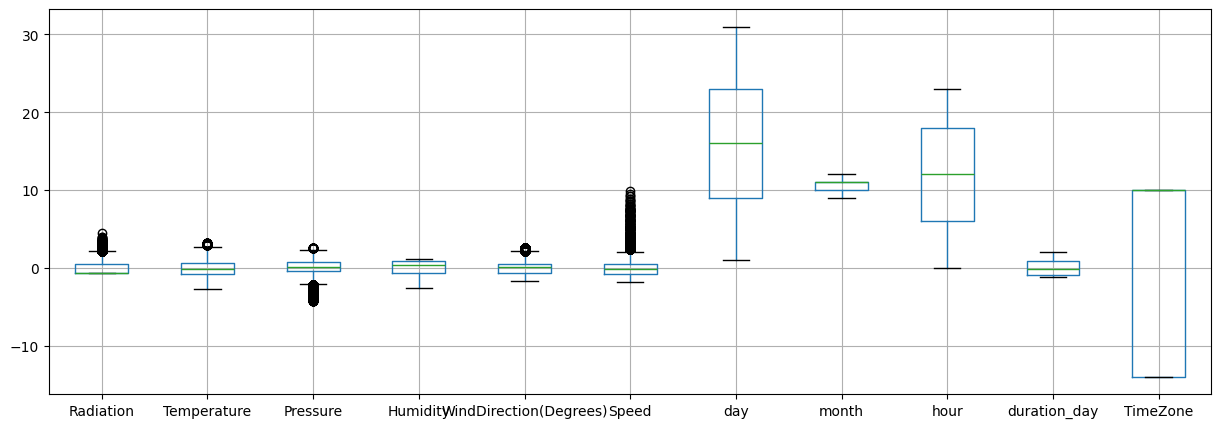

In [98]:
datos_scaled.drop('year', axis=1, inplace=True)
datos_scaled.boxplot(figsize=(15, 5))

plt.show()

## Ingenieria de modelos

Ya en este punto preparamos el dataset para entrenamiento de un modelo de clasificación utilizando RandomForestClassifier. Adicionalmente, devidimos los datos en conjunto de entrenamiento y prueba, por último entrenamos el modelo para determinar la importancia de las caracteristicas.

In [99]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import time
import numpy as np

#Asignacion de informacion a variables X, y
X = datos_scaled[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed','hour']]
y = datos_scaled['RadiationLevel']

#Creacion de modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

#creación de una lista de los nombres de todas las columnas (características)
feature_names = [f"{X.columns[i]}" for i in range(X.shape[1])]

#Entrenamiento de modelo
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

#start_time = time.time()
#importances = forest.feature_importances_
#std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
#elapsed_time = time.time() - start_time
#forest_importances = pd.Series(importances, index=feature_names)

#fig, ax = plt.subplots()
#forest_importances.plot.bar(yerr=std, ax=ax)
#ax.set_title("Feature importances using MDI")
#ax.set_ylabel("Mean decrease in impurity")
#fig.tight_layout()
print("Accuracy en entrenamiento: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy en prueba: {:.3f}".format(forest.score(X_test, y_test)))
print(classification_report(y_test, forest.predict(X_test)))

Accuracy en entrenamiento: 0.999
Accuracy en prueba: 0.797
              precision    recall  f1-score   support

        Alto       0.89      0.90      0.90      2043
        Bajo       0.66      0.59      0.63      1663
       Medio       0.85      0.84      0.84      2040
    Muy Bajo       0.76      0.81      0.78      2426

    accuracy                           0.80      8172
   macro avg       0.79      0.79      0.79      8172
weighted avg       0.79      0.80      0.80      8172



A continuación visualizamos el número de predicciones correctas e incorrectas para cada clase. Cada fila de la matriz representa las instancias de una clase verdadera, mientras que cada columna representa las instancias de una clase predicha, es decir, nos permite evaluar y entender el rendimiento de los modelos de clasificación, permitiendonos identificar donde el modelo puede estar fallando

In [100]:
#implementamos arbol de desicion
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
y= datos_scaled['RadiationLevel']
X = datos_scaled[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed','hour']]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
tree.fit(X_train, y_train)
print("Accuracy en entrenamiento: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy en prueba: {:.3f}".format(tree.score(X_test, y_test)))
print(classification_report(y_test, tree.predict(X_test)))

Accuracy en entrenamiento: 0.999
Accuracy en prueba: 0.751
              precision    recall  f1-score   support

        Alto       0.87      0.86      0.87      2043
        Bajo       0.57      0.58      0.58      1663
       Medio       0.80      0.79      0.80      2040
    Muy Bajo       0.74      0.74      0.74      2426

    accuracy                           0.75      8172
   macro avg       0.74      0.74      0.74      8172
weighted avg       0.75      0.75      0.75      8172



**Conclusión**: El modelo de árbol de decisión muestra un buen ajuste a los datos de entrenamiento, pero su desempeño en el conjunto de prueba sugiere un posible sobreajuste. Aunque el modelo predice bien los niveles "Alto" y "Medio" de radiación, tiene dificultades con los niveles "Bajo" y "Muy Bajo". En conclusión, aunque este modelo tiene un desempeño aceptable, hay margen que podríamos mejorar para aumentar precisión y capacidad de generalización.

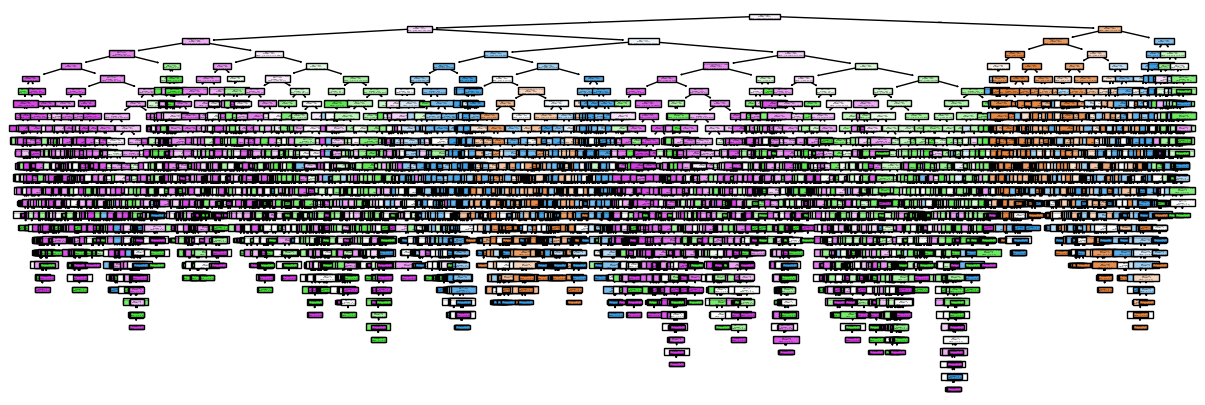

In [101]:
plt.figure(figsize=(15, 5))
from sklearn.tree import plot_tree
plot_tree(tree, feature_names=feature_names, filled=True)
plt.show()

In [102]:
#implementamos kneighborsClasifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
y= datos_scaled['RadiationLevel']
X = datos_scaled[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed','hour']]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
knn.fit(X_train, y_train)
print("Accuracy en entrenamiento: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy en prueba {:.3f}".format(knn.score(X_test, y_test)))
print(classification_report(y_test, knn.predict(X_test)))

Accuracy en entrenamiento: 0.844
Accuracy en prueba 0.766
              precision    recall  f1-score   support

        Alto       0.88      0.88      0.88      2043
        Bajo       0.61      0.57      0.59      1663
       Medio       0.81      0.81      0.81      2040
    Muy Bajo       0.74      0.77      0.76      2426

    accuracy                           0.77      8172
   macro avg       0.76      0.76      0.76      8172
weighted avg       0.76      0.77      0.77      8172



**Conclusión**: El modelo KNeighborsClassifier nos muestra un buen ajuste a los datos de entrenamiento y generaliza razonablemente bien a datos nuevos. Aunque el modelo predice bien los niveles "Alto" y "Medio" de radiación, tiene dificultades con los niveles "Bajo" y "Muy Bajo". Dado que el objetivo es predecir las ciudades con mayor viabilidad para el uso de paneles solares, el modelo proporciona una base sólida para identificar áreas con altos niveles de radiación.

**Modelo RandomForestClassifier**

Evaluamos el rendimiento del modelo de manera más robusta al dividir los datos en multiples particiones para evaluar el score o la precisión del modelos de las diferentes particiones de los datos

In [103]:
forest = RandomForestClassifier(random_state=0)
y= datos_outlier_recordatos_scaled['RadiationLevel']
X = datos_outlier_recordatos_scaled[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed','hour']]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest.fit(X_train, y_train)
print("Accuracy en entrenamiento: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy en prueba {:.3f}".format(forest.score(X_test, y_test)))
print(classification_report(y_test, forest.predict(X_test)))

Accuracy en entrenamiento: 0.999
Accuracy en prueba 0.787
              precision    recall  f1-score   support

        Alto       0.88      0.87      0.87      1552
        Bajo       0.66      0.59      0.62      1663
       Medio       0.84      0.85      0.85      2040
    Muy Bajo       0.76      0.81      0.78      2426

    accuracy                           0.79      7681
   macro avg       0.79      0.78      0.78      7681
weighted avg       0.78      0.79      0.78      7681



In [104]:
print(forest.n_estimators)
print(forest.max_depth)

100
None


In [76]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [60, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}


In [105]:
#realizar cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest, X, y, cv=5)
print(scores)

[0.61969081 0.5382487  0.60791016 0.61686198 0.62841797]


A continuación vamos a evaluar la viablidad de la aplicación utilizando variables como temperatura, presión, humedad, dirección del viento, velocidad del viento y la hora del día. Ejemplo: dentro de estás lineas buscamos predecir la radiación solar basado en las variables mencionadas anteriormente.

In [106]:
#modelo de regresion
from sklearn.ensemble import RandomForestRegressor
X = datos_scaled[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed','hour']]
y = datos_scaled['Radiation']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

Realizamos una validación cruzada con 5 particiones para evaluar la estabilidad y el rendimiento del modelo, de igual forma calculamos y mostramos las métricas de rendimiento del modelo.

In [107]:
#realizar cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regr, X, y, cv=5)
print(scores)
#metricas de regresion
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred))

[0.80634436 0.87975106 0.83940772 0.87939363 0.5374919 ]
Mean squared error:  0.09341164310268961
Mean absolute error:  0.1307697173302355


Obtenemos los datos climaticos a partir de una API externa (WeatherAPI) para una ubicación especifica (Podemos poner cualquier ciudad)

In [108]:
from google.colab import userdata
clave = userdata.get('key')

In [109]:
import requests
URL = 'https://api.weatherapi.com/v1/current.json'
HEADERS={'Content-Type': 'application/json', 'Accept': 'application/json'}
PARAMETERS = {
    'key':clave,
    'q':'medellin',
    'aqi':'no'
}
response = requests.get(url=URL, params=PARAMETERS,headers=HEADERS)
datos_api = response.json()

In [110]:
datos_api['current']
#print(datos_api)


{'last_updated_epoch': 1734194700,
 'last_updated': '2024-12-14 11:45',
 'temp_c': 18.2,
 'temp_f': 64.8,
 'is_day': 1,
 'condition': {'text': 'Partly cloudy',
  'icon': '//cdn.weatherapi.com/weather/64x64/day/116.png',
  'code': 1003},
 'wind_mph': 2.2,
 'wind_kph': 3.6,
 'wind_degree': 242,
 'wind_dir': 'WSW',
 'pressure_mb': 1025.0,
 'pressure_in': 30.27,
 'precip_mm': 0.14,
 'precip_in': 0.01,
 'humidity': 68,
 'cloud': 75,
 'feelslike_c': 18.2,
 'feelslike_f': 64.8,
 'windchill_c': 19.7,
 'windchill_f': 67.4,
 'heatindex_c': 19.7,
 'heatindex_f': 67.4,
 'dewpoint_c': 13.7,
 'dewpoint_f': 56.7,
 'vis_km': 10.0,
 'vis_miles': 6.0,
 'uv': 6.9,
 'gust_mph': 6.7,
 'gust_kph': 10.8}

In [111]:
datos_a_evaluar = [datos_api['current']['temp_f'],datos_api['current']['pressure_in'],datos_api['current']['humidity'],datos_api['current']['wind_degree'],datos_api['current']['wind_kph'],datetime.now().hour]
datos_evaluar = pd.DataFrame([datos_a_evaluar], columns=forest.feature_names_in_)
print(datos_evaluar)
prediccion = forest.predict(datos_evaluar)
print(forest.feature_names_in_)
print(prediccion)

   Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed  hour
0         64.8     30.27        68                     242    3.6    17
['Temperature' 'Pressure' 'Humidity' 'WindDirection(Degrees)' 'Speed'
 'hour']
['Medio']


A continuación vamos a exportar el proyecto utilizando la biblioteca pickle.

In [112]:
#exportar modelos
import pickle



pickle.dump(forest, open('classification_model.pkl', 'wb'))
pickle.dump(regr, open('regression_model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))


In [113]:
scalador = StandardScaler()
scalador.fit(datos_scaled[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed','hour']])
pickle.dump(scalador, open('scaler.pkl', 'wb'))